#### Visualizing Time Series Data

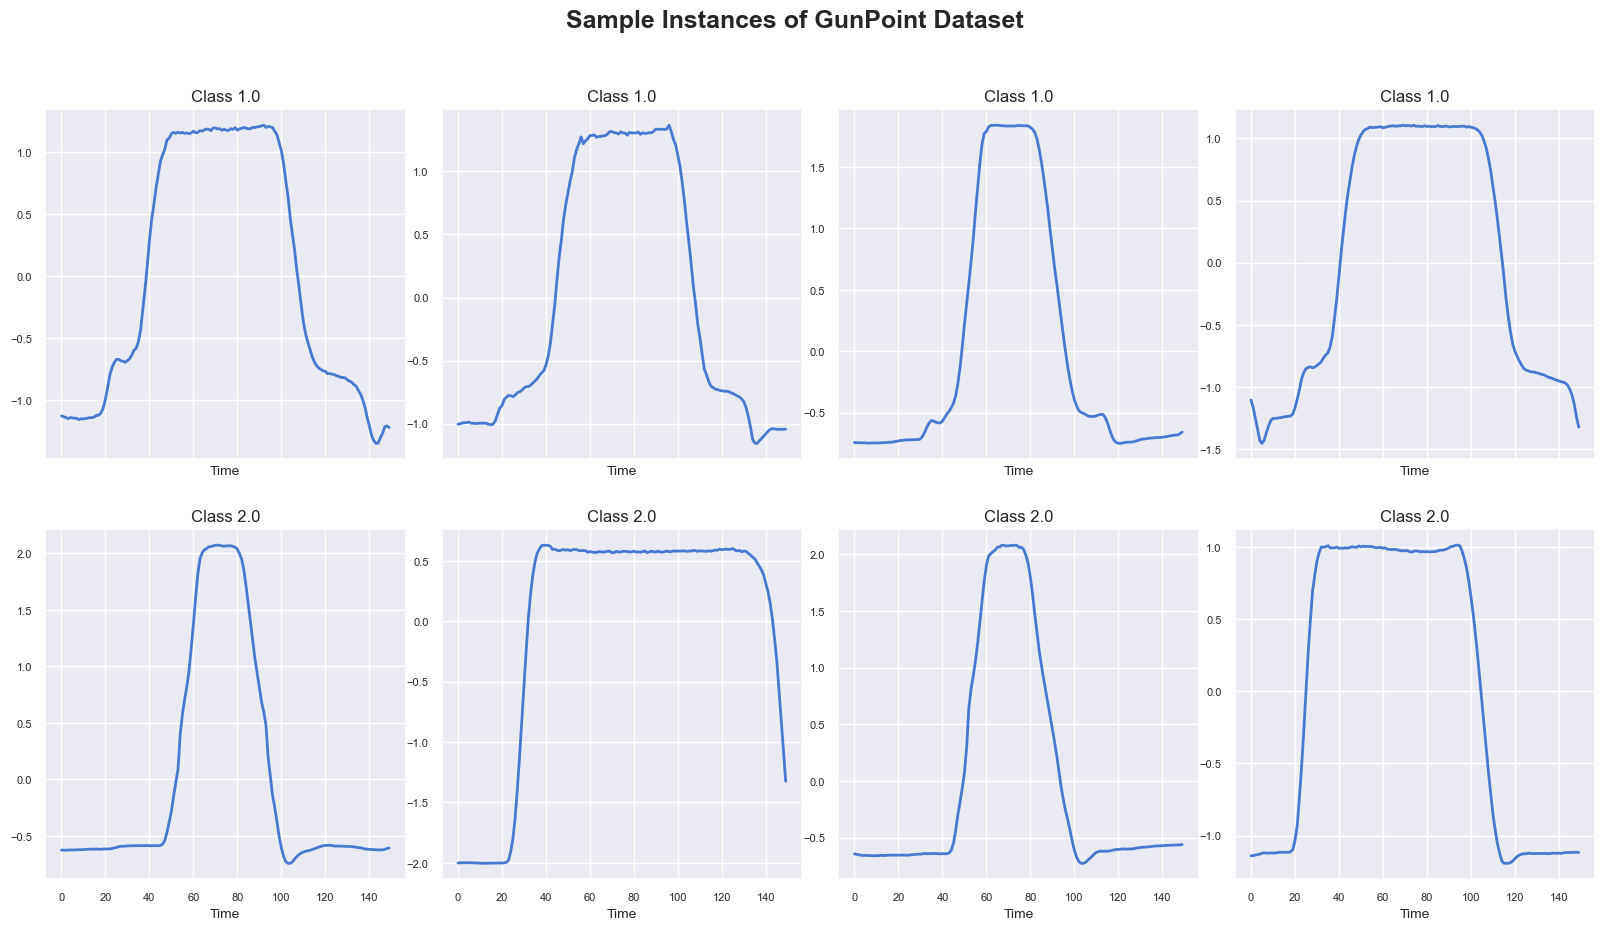

In [100]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from utils.utils import read_dataset
import math
import seaborn as sns 




def plot_timeseries_data(samples, labels, title, hspace=0.1):
    assert len(samples) % 4 == 0

    sns.set(style="darkgrid", palette="muted")
    n_samples = len(samples)
    n_cols = 4
    n_rows = math.ceil(n_samples / n_cols)
    figsize = (20, 10)
    fig, axs = plt.subplots(n_rows, n_cols, sharex=True, figsize=figsize)

    for i in range(n_samples):
        row = i // n_cols
        col = i % n_cols
        axs[row, col].plot(samples[i].flatten(), linewidth=2)
        axs[row, col].set_title(f"Class {labels.flatten()[i]}", fontsize=12)
        axs[row, col].set_xlabel("Time", fontsize=10)
        #axs[row, col].set_ylabel("Value", fontsize=10)
        axs[row, col].tick_params(labelsize=8)

    fig.suptitle(title, fontsize=18, fontweight='bold')
    plt.subplots_adjust(hspace=hspace,wspace=0.1)
    plt.show()

x_train,y_train,x_test,y_test = read_dataset(".","ucr","GunPoint", "original", 1)["GunPoint"]
sample_values = list(np.where(y_test.flatten()==1)[0][:4])+list(np.where(y_test.flatten()==2)[0][:4])
plot_timeseries_data(x_test[sample_values],y_test[sample_values],"Sample Instances of GunPoint Dataset")


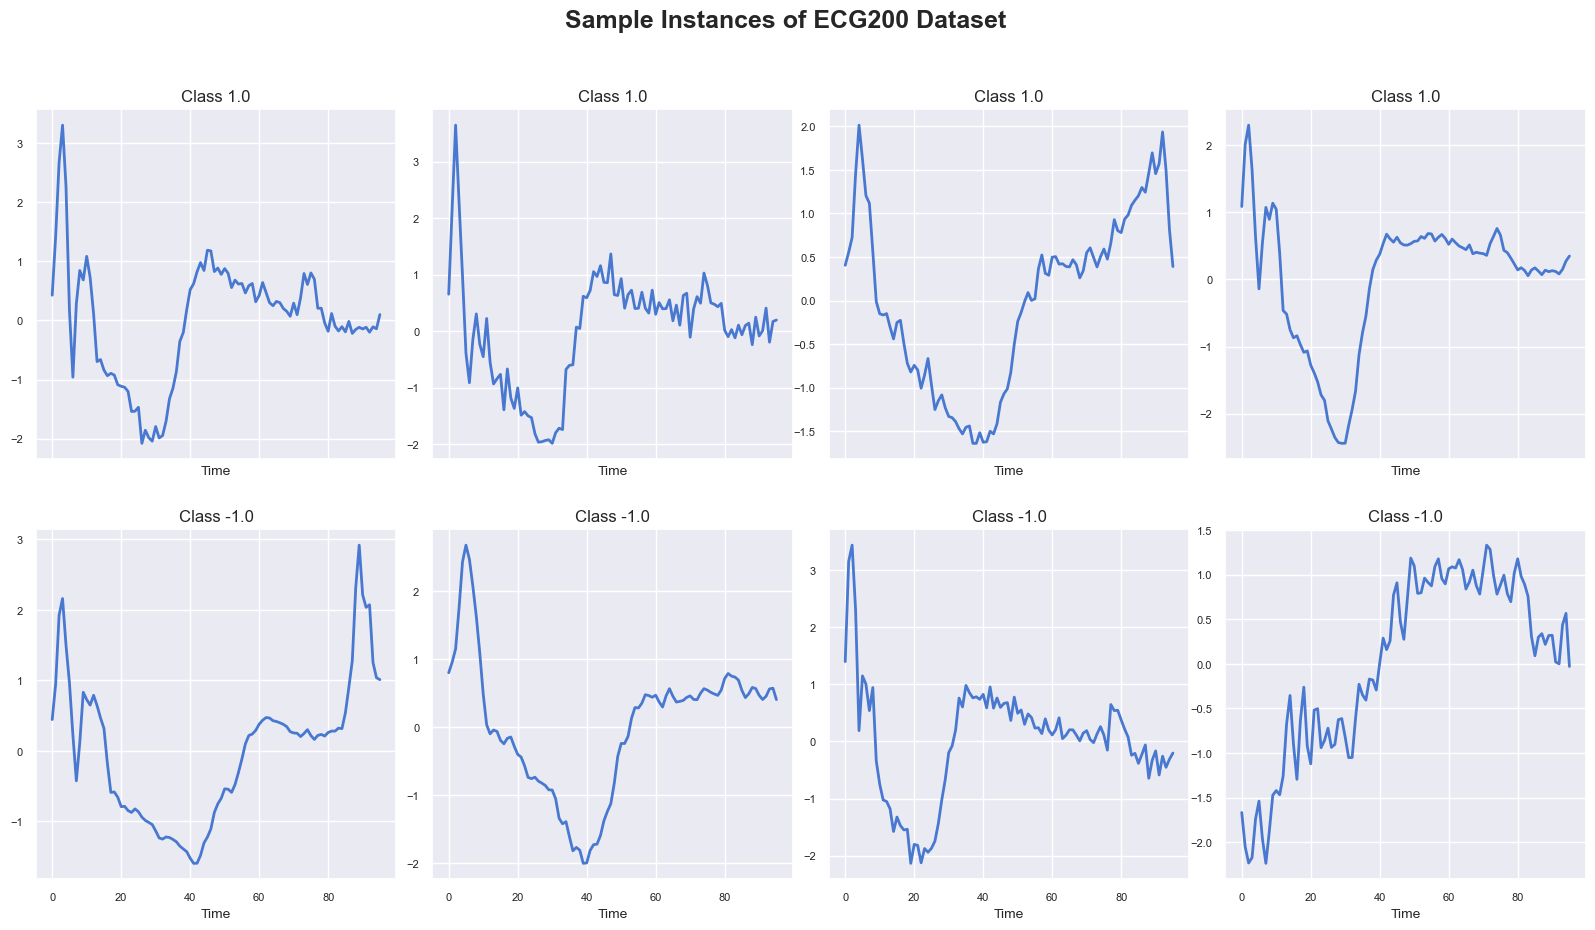

In [101]:
dataset = "ECG200"
x_train,y_train,x_test,y_test = read_dataset(".","ucr",dataset, "original", 1)[dataset]
sample_values = list(np.where(y_test.flatten()==1)[0][:4])+list(np.where(y_test.flatten()==-1)[0][:4])
plot_timeseries_data(x_test[sample_values],y_test[sample_values],f"Sample Instances of {dataset} Dataset")

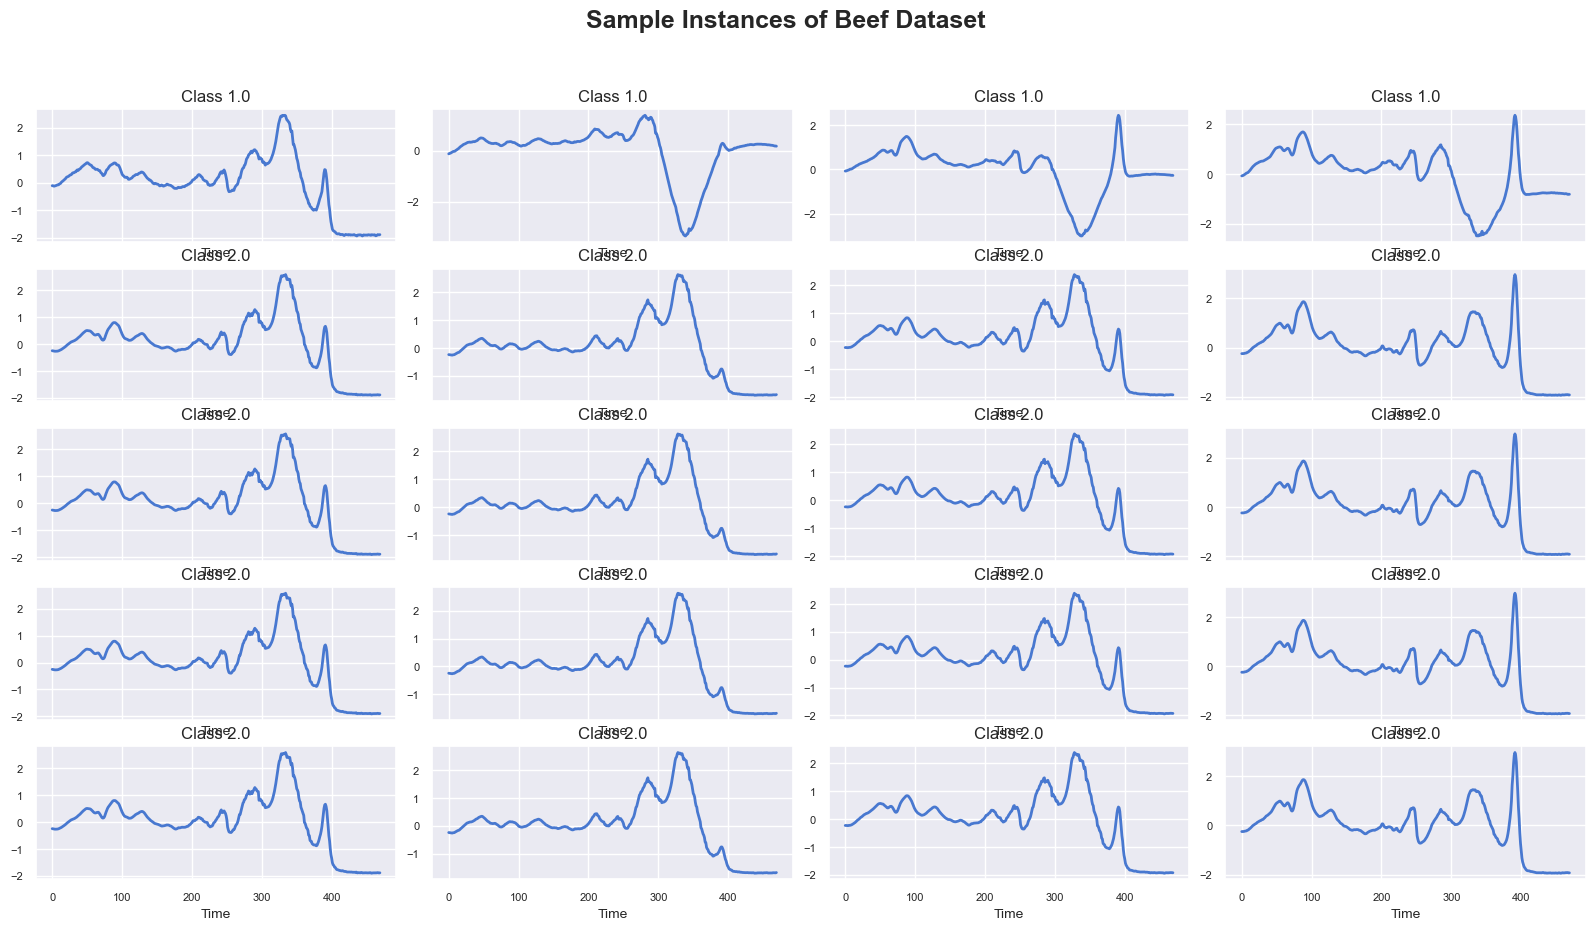

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.]])

In [102]:
dataset = "Beef"
x_train,y_train,x_test,y_test = read_dataset(".","ucr",dataset, "original", 1)[dataset]
sample_values = list(np.where(y_test.flatten()==1)[0][:4])+list(np.where(y_test.flatten()==2)[0][:4])+list(np.where(y_test.flatten()==2)[0][:4])+list(np.where(y_test.flatten()==2)[0][:4])+list(np.where(y_test.flatten()==2)[0][:4])
plot_timeseries_data(x_test[sample_values],y_test[sample_values],f"Sample Instances of {dataset} Dataset")
y_test

In [98]:
y_test.flatten()

array([1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3.,
       3., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 5., 5.])

In [57]:
y_test

array([[1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],